In [1]:
# Import Libraries
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#  Data collection of cryptocurrencies - "Bitcoin-USD", "Ethereum-USD", "BinanceCoin-USD"
symbols = ["BTC-USD", "ETH-USD", "BNB-USD"]
start_date = "2020-01-01"
end_date = "2024-01-01"

In [3]:
# Download historical data 
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"].round(2)

[*********************100%%**********************]  3 of 3 completed


In [4]:
data.tail()

,BNB-USD,BTC-USD,ETH-USD
Date,,,
2023-12-27,323.68,43442.86,2378.74
2023-12-28,323.60,42627.86,2347.57
2023-12-29,313.88,42099.40,2300.69
2023-12-30,317.17,42156.90,2292.07
2023-12-31,312.44,42265.19,2281.47


In [5]:
# Portfolio Creation
crypto_portfolio = data.copy()

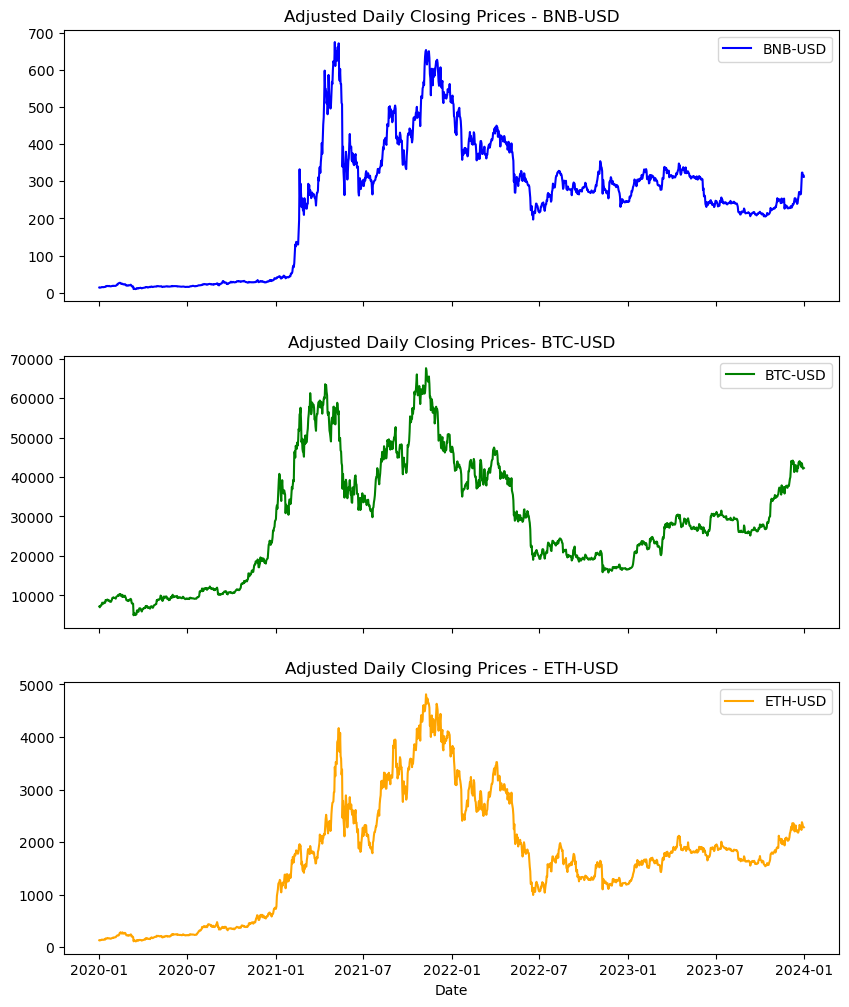

In [6]:
#  Plot Daily adj. closing prices of the Crytocurrencies
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
ax1.plot(crypto_portfolio["BNB-USD"], label="BNB-USD", color="blue")
ax1.set_title("Adjusted Daily Closing Prices - BNB-USD")
ax1.legend()

ax2.plot(crypto_portfolio["BTC-USD"], label="BTC-USD", color="green")
ax2.set_title("Adjusted Daily Closing Prices- BTC-USD")
ax2.legend()

ax3.plot(crypto_portfolio["ETH-USD"], label="ETH-USD", color="orange")
ax3.set_title("Adjusted Daily Closing Prices - ETH-USD")
ax3.legend()

plt.xlabel("Date")
plt.show()


In [7]:
# Calculate  Daily Returns
returns = crypto_portfolio.pct_change().dropna()

In [8]:
returns.head()

,BNB-USD,BTC-USD,ETH-USD
Date,,,
2020-01-02,-0.048210,-0.029819,-0.025917
2020-01-03,0.048350,0.051451,0.053057
2020-01-04,0.016837,0.008956,0.006708
2020-01-05,0.015839,0.000089,0.008958
2020-01-06,0.060241,0.048291,0.058849


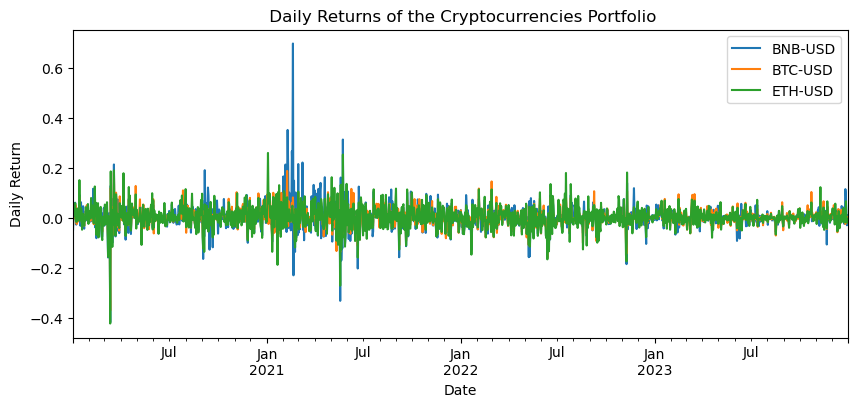

In [9]:
#Plot Daily returns
returns.plot(xlabel = "Date", ylabel = "Daily Return", title=" Daily Returns of the Cryptocurrencies Portfolio", figsize=(10, 4));

In [10]:
# Step 4: Compute Portfolio Statistics
daily_avg_return = returns.mean()
daily_sd = returns.std()
daily_variance = daily_sd**2
annual_avg_return = daily_avg_return*365
annual_sd = daily_sd*np.sqrt(365)
skewness = returns.skew()
kurtosis = returns.kurtosis()

In [11]:
pd.DataFrame([daily_avg_return,daily_sd,daily_variance,annual_avg_return,annual_sd,skewness,kurtosis],
             index= ["Average Daily Return","Daily Standard Deviation","Daily Variance", "Annual Average Return","Annual Standard Deviation","Skewness","Kurtosis"])

,BNB-USD,BTC-USD,ETH-USD
Average Daily Return,0.003398,0.001832,0.003016
Daily Standard Deviation,0.050750,0.034799,0.045419
Daily Variance,0.002576,0.001211,0.002063
Annual Average Return,1.240314,0.668858,1.100813
Annual Standard Deviation,0.969574,0.664829,0.867735
Skewness,1.741967,-0.642585,-0.426847
Kurtosis,32.647627,11.764593,8.878626


In [12]:
#Create Correlation Matrix
correlations = returns.corr().round(2)
correlations

,BNB-USD,BTC-USD,ETH-USD
BNB-USD,1.00,0.67,0.69
BTC-USD,0.67,1.00,0.82
ETH-USD,0.69,0.82,1.00


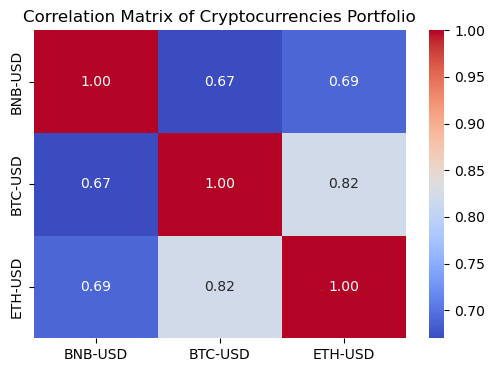

In [13]:
# Plot a heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Cryptocurrencies Portfolio")
plt.show()

In [14]:
#Create Covariance Matrix
covariances = returns.cov().round(4)
covariances

,BNB-USD,BTC-USD,ETH-USD
BNB-USD,0.0026,0.0012,0.0016
BTC-USD,0.0012,0.0012,0.0013
ETH-USD,0.0016,0.0013,0.0021


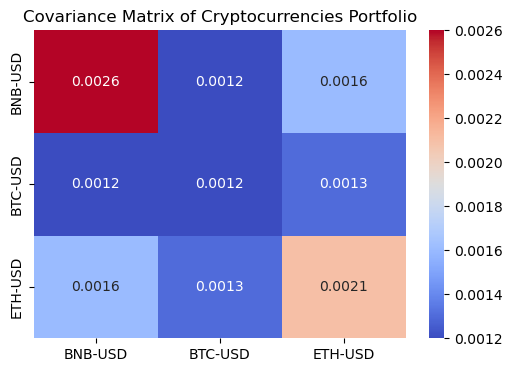

In [15]:
#  Plot a heatmap for the covariance matrix
plt.figure(figsize=(6, 4))
sns.heatmap(covariances, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Covariance Matrix of Cryptocurrencies Portfolio")
plt.show()